# Import torch, torchvision, numpy...

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import scipy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, ConcatDataset, Dataset


import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

import utils

# Datasets

## Download (MNIST, SVHN, COMBINED )

In [5]:
#Mean: tensor([0 1309, 0.1309, 0.1309])
#Standard Deviation: tensor([0.2893, 0.2893, 0.2893])
train_dataset_mnist = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.Compose([transforms.Grayscale(3),
                                    transforms.Resize((128, 128)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
    download = True,            
)
test_dataset_mnist = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = transforms.Compose([transforms.Grayscale(3),
                                    transforms.Resize((128, 128)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
)


#Mean: tensor([0.4377, 0.4438, 0.4728])
#Standard Deviation: tensor([0.1980, 0.2010, 0.1970])
train_dataset_svhn = datasets.SVHN(
    root = 'data/SVHN',
    split = 'train',
    transform = transforms.Compose([transforms.Resize((128, 128)),
                                    ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
    download = True,            
)
test_dataset_svhn = datasets.SVHN(
    root = 'data/SVHN', 
    split = 'test', 
    transform = transforms.Compose([transforms.Resize((128, 128)),
                                    ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
    download = True,
)

## Creating a Concatened Dataset
train_dataset_combined = ConcatDataset([train_dataset_mnist,train_dataset_svhn])
test_dataset_combined = ConcatDataset([test_dataset_mnist,test_dataset_svhn])



# dataloaders
train_dataloader_mnist = torch.utils.data.DataLoader(train_dataset_mnist,batch_size=64, shuffle=False)
test_dataloader_mnist = torch.utils.data.DataLoader(test_dataset_mnist,batch_size=64, shuffle=False)

train_dataloader_svhn = torch.utils.data.DataLoader(train_dataset_svhn,batch_size=64, shuffle=False)
test_dataloader_svhn = torch.utils.data.DataLoader(test_dataset_svhn,batch_size=64, shuffle=False)

train_dataloader_combined = DataLoader(train_dataset_combined, batch_size=64, shuffle=False)
test_dataloader_combined = DataLoader(test_dataset_combined, batch_size=64, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

classes_20 = ["0-mnist", "1-mnist", "2-mnist", "3-mnist", "4-mnist", "5-mnist", "6-mnist", "7-mnist", "8-mnist", "9-mnist",
           "0-svhn", "1-svhn", "2-svhn", "3-svhn", "4-svhn", "5-svhn", "6-svhn", "7-svhn", "8-svhn", "9-svhn"]

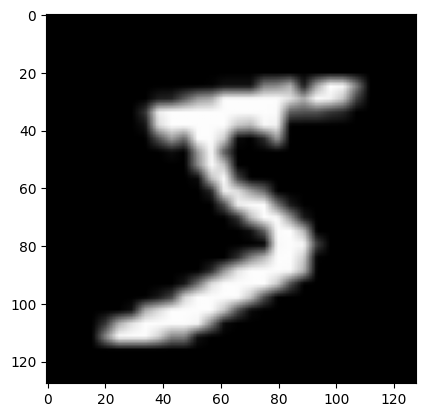

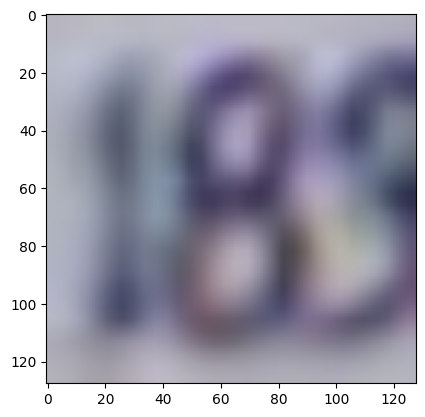

In [4]:
# utils.imshow(train_dataset_mnist[)



utils.imshow(train_dataset_mnist[0][0])
utils.imshow(test_dataset_svhn[9][0])



#dando erro
# utils.imshow(test_dataset_mnist.data[0], True, 'mnist')
# plt.imshow(test_dataset_mnist[9][0], cmap='gray')
# print(teste_dtset.data.)

In [3]:
# Calculate mean and std
#mean, std = get_mean_and_std(test_loader)
#print(f'Mean: {mean}')
#print(f'Standard Deviation: {std}')

## Print Datasets


### MNIST

torch.Size([28, 28])
torch.Size([128, 128])


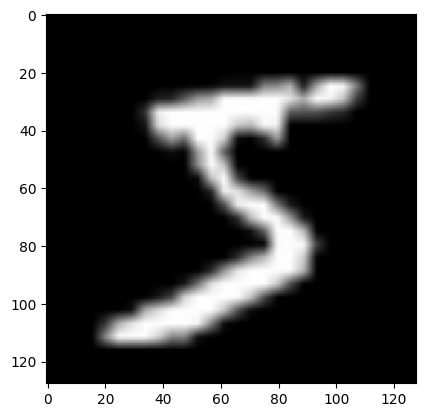

torch.Size([3, 128, 128])


In [53]:
print(train_dataset_mnist.data[0].shape)
plt.imshow(train_dataset_mnist.data[0], cmap='gray')

print(train_dataset_mnist[0][0][0].shape)
plt.imshow(train_dataset_mnist[0][0][0], cmap='gray')

# plt.title('%i' % train_dataset_mnist.targets[0])
plt.show()

# plt.figure()
print(train_dataset_mnist[0][0].shape)

# plt.title('%i' % train_dataset_mnist.targets[2])
# utils.imshow(train_dataset_mnist[2][0])
# plt.show()

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset_mnist), size=(1,)).item()
    img = train_dataset_mnist.data[sample_idx]
    label = train_dataset_mnist.targets[sample_idx].item()
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

### SVHN

torch.Size([3, 32, 32])


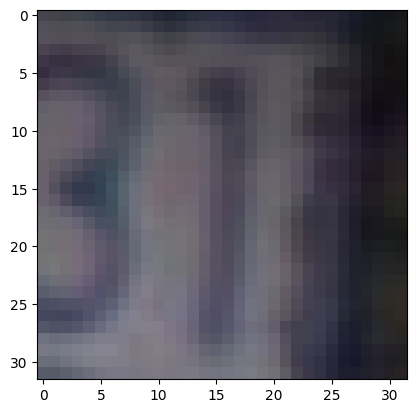

In [68]:
plt.figure()
print(train_dataset_svhn[0][0].shape)
imshow(train_dataset_svhn[9][0])

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset_svhn), size=(1,)).item()
    img, label = train_dataset_svhn[sample_idx]
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    # plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

### Concatened

6


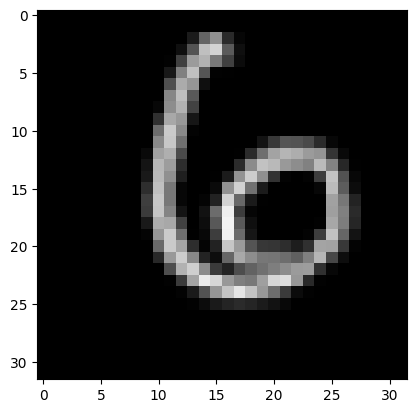

6


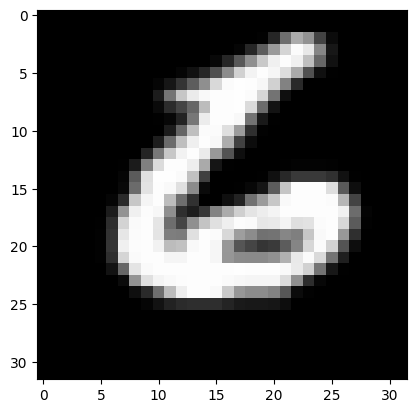

5


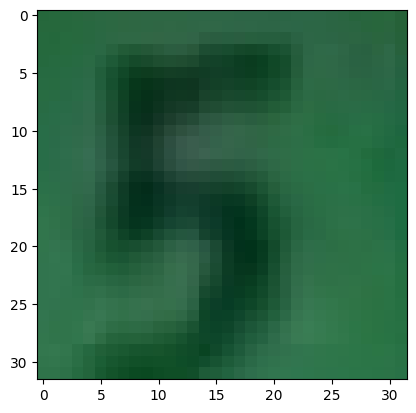

7


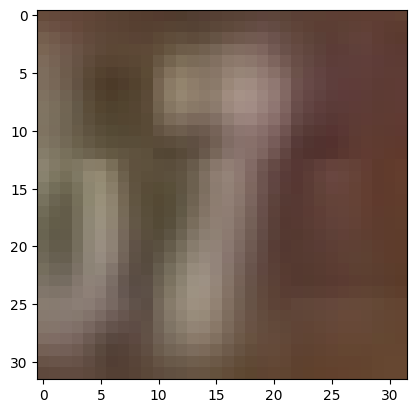

In [70]:
# Inicio
print(test_dataset_combined[100][1])
imshow(test_dataset_combined[100][0])
#mnist 0 - 9999
print(test_dataset_combined[9999][1])
imshow(test_dataset_combined[9999][0])
# Fim


# svhn 10000 - 36031
print(test_dataset_combined[10000][1])
imshow(test_dataset_combined[10000][0])
print(test_dataset_combined[36031][1])
imshow(test_dataset_combined[36031][0])
# Fim


# Models

## Create or Load

In [61]:
model_mnist = utils.create_resnet_model()
model_svhn = utils.create_resnet_model()
model_combined = utils.create_resnet_model()

In [6]:
model_mnist = utils.create_resnet_model('./my_weights/mnist_128.pth')
model_svhn = utils.create_resnet_model('./my_weights/svhn_128.pth')
model_combined = utils.create_resnet_model('./my_weights/combined_128.pth')

## Train and Save

In [62]:
# utils.train(model_mnist, train_dataloader_mnist,  epochs=10, lr=0.001)
# torch.save(model_mnist.state_dict(), './my_weights/mnist_128.pth')


# train(model_svhn, train_dataloader_svhn, device, epochs=10, lr=0.001)
# torch.save(model_svhn.state_dict(), './my_weights/svhn.pth')


# train(model_combined, train_dataloader_combined, device, epochs=10, lr=0.001)
# torch.save(model_combined.state_dict(), './my_weights/combined.pth')

Epoch 1/10 - Loss: 0.0784, Accuracy: 97.73%
Epoch 2/10 - Loss: 0.0390, Accuracy: 98.86%
Epoch 3/10 - Loss: 0.0293, Accuracy: 99.17%
Epoch 4/10 - Loss: 0.0243, Accuracy: 99.30%
Epoch 5/10 - Loss: 0.0213, Accuracy: 99.38%
Epoch 6/10 - Loss: 0.0175, Accuracy: 99.46%
Epoch 7/10 - Loss: 0.0164, Accuracy: 99.53%
Epoch 8/10 - Loss: 0.0142, Accuracy: 99.58%
Epoch 9/10 - Loss: 0.0112, Accuracy: 99.68%
Epoch 10/10 - Loss: 0.0113, Accuracy: 99.67%
Training complete.


## Evaluate

In [7]:
# Test each model in itself dataset
test_loss, accuracy = utils.evaluate(model_mnist, test_dataloader_mnist)
print(f"model_mnist - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(model_svhn, test_dataloader_svhn)
print(f"model_svhn - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(model_combined, test_dataloader_combined)
print(f"model_combined - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

model_mnist - Test Loss: 0.0371, Accuracy: 99.12
model_svhn - Test Loss: 0.2756, Accuracy: 94.96
model_combined - Test Loss: 0.2356, Accuracy: 95.46


In [7]:
# Test each model in combined dataset
test_loss, accuracy = utils.evaluate(model_mnist, test_dataloader_combined)
print(f"model_mnist - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(model_svhn, test_dataloader_combined)
print(f"model_svhn - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(model_combined, test_dataloader_combined)
print(f"model_combined - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

model_mnist - Test Loss: 18.1053, Accuracy: 42.26
model_svhn - Test Loss: 0.5231, Accuracy: 89.40
model_combined - Test Loss: 0.2356, Accuracy: 95.46


# Copycat

In [8]:
from torch.utils.data import DataLoader
from image_list import ImageList

## Attack Dataset

In [9]:
# Define dataset
attack_dataset = ImageList(
    filename="data/attack_dataset.txt",
    root="data/IMAGENET/",
    color=True,
    transform=transforms.ToTensor(),
    return_filename=True
)

# Create DataLoader
attack_dataloader = DataLoader(attack_dataset, batch_size=64, shuffle=False)

In [10]:
# Iterate through the DataLoader
for img, label, path in attack_dataloader:
    print(f"Image path: {path[0]}")
    print(f"Image shape: {img[0].shape}")
    print(f"Label: {label[0]}")
    # for i in range(4):
        # print(f"{path[i]} {label[i]}")
    # plt.imshow(img[2])
    break

Image path: data/IMAGENET/1-n02119789/n02119789_11756.jpeg
Image shape: torch.Size([3, 128, 128])
Label: 1


In [11]:
print(attack_dataset.data[9000])
print(attack_dataset.targets[9000])

103-n02134084/n02134084_20677.jpeg
103


In [71]:
!head -n 10 data/attack_dataset.txt
print(attack_dataset)

1-n02119789/n02119789_11756.jpeg 1
1-n02119789/n02119789_11309.jpeg 1
1-n02119789/n02119789_11131.jpeg 1
1-n02119789/n02119789_14615.jpeg 1
1-n02119789/n02119789_2159.jpeg 1
1-n02119789/n02119789_13095.jpeg 1
1-n02119789/n02119789_8146.jpeg 1
1-n02119789/n02119789_2212.jpeg 1
1-n02119789/n02119789_10572.jpeg 1
1-n02119789/n02119789_5975.jpeg 1
Dataset ImageList:
    Number of datapoints: 1270431
     * Class 0:   3897 samples
     * Class 1:   4970 samples
     * Class 2:   5188 samples
     * Class 3:   4706 samples
     * Class 4:   4902 samples
     * Class 5:   5173 samples
     * Class 6:   4797 samples
     * Class 7:   5178 samples
     * Class 8:   5177 samples
     * Class 9:   5184 samples
     * Class 10:   5179 samples
     * Class 11:   5163 samples
     * Class 12:   5166 samples
     * Class 13:   5177 samples
     * Class 14:   4916 samples
     * Class 15:   4850 samples
     * Class 16:   4965 samples
     * Class 17:   4737 samples
     * Class 18:   4878 samples
   

## Extract Models

In [12]:
def extract_model(model, dataloader, output_file, save_softlabels=False, device="cuda" if torch.cuda.is_available() else "cpu", n_bacthes=None):
    """
    Faz inferência com um modelo PyTorch e salva o caminho da imagem e a classe inferida em um arquivo de saída.

    Args:
        model (torch.nn.Module): Modelo PyTorch treinado.
        dataloader (torch.utils.data.DataLoader): DataLoader com imagens e seus caminhos.
        output_file (str): Caminho do arquivo de saída.
        save_softlabels (bool, optional): Se True, salva as probabilidades para todas as classes. Default: False.
        device (str, optional): Dispositivo para inferência ("cuda" ou "cpu"). Default: "cuda" se disponível.
    """
    model.to(device)
    model.eval()  # Modo de inferência
    total = 0
    with open(output_file, "w") as f:
        with torch.no_grad():
            for images, _labels, paths in dataloader:  # Assumindo que o dataset retorna (imagem, caminho)
                if(n_bacthes != None and total == n_bacthes):
                    break
                total+=1
                images = images.to(device)
                outputs = model(images)

                if save_softlabels:
                    softlabels = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
                    for path, probs in zip(paths, softlabels):
                        probs_str = " ".join(map(str, probs))  # Converte lista de probabilidades para string
                        f.write(f"{path} {probs_str}\n")
                else:
                    _, preds = torch.max(outputs, 1)  # Obtém a classe com maior probabilidade
                    for path, pred in zip(paths, preds.cpu().numpy()):
                        f.write(f"{path} {pred}\n")  # Salva caminho da imagem e classe inferida

    print(f"Inferência concluída. Resultados salvos em {output_file}")

In [15]:
# Test
# extract_model(model_mnist, attack_dataloader, "extracted_mnist.txt", n_bacthes=1000)


# extract_model(model_mnist, attack_dataloader, "extracted_mnist.txt")
# extract_model(model_svhn, attack_dataloader, "extracted_svhn.txt")

Inferência concluída. Resultados salvos em extracted_svhn.txt


In [14]:
#verificando o fake dataset
!head data/extracted_mnist.txt 
print("===========")
!head data/extracted_svhn.txt 

1-n02119789/n02119789_11756.jpeg 1
1-n02119789/n02119789_11309.jpeg 1
1-n02119789/n02119789_11131.jpeg 1
1-n02119789/n02119789_14615.jpeg 1
1-n02119789/n02119789_2159.jpeg 1
1-n02119789/n02119789_13095.jpeg 1
1-n02119789/n02119789_8146.jpeg 1
1-n02119789/n02119789_2212.jpeg 1
1-n02119789/n02119789_10572.jpeg 1
1-n02119789/n02119789_5975.jpeg 1
1-n02119789/n02119789_11756.jpeg 7
1-n02119789/n02119789_11309.jpeg 7
1-n02119789/n02119789_11131.jpeg 3
1-n02119789/n02119789_14615.jpeg 5
1-n02119789/n02119789_2159.jpeg 8
1-n02119789/n02119789_13095.jpeg 1
1-n02119789/n02119789_8146.jpeg 3
1-n02119789/n02119789_2212.jpeg 1
1-n02119789/n02119789_10572.jpeg 1
1-n02119789/n02119789_5975.jpeg 4


## Train Copycat

In [ ]:
def process_file(input_path, output_path):
    with open(input_path, 'r') as infile, open(output_path, 'w') as outfile:
        for line in infile:
            processed_line = line.replace("data/IMAGENET/", "", 1)  # Remove apenas a primeira ocorrência
            outfile.write(processed_line)

# Exemplo de uso
# process_file("data/extracted_mnist1.txt", "data/extracted_mnist.txt")
# process_file("data/extracted_svhn1.txt", "data/extracted_svhn.txt")

In [15]:
fake_dataset_mnist = ImageList(
    filename="data/extracted_mnist.txt",
    root="data/IMAGENET",
    color=True,
    transform = transforms.Compose([transforms.Resize((128, 128)),
                                    ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
    return_filename=False
)
fake_dataset_svhn = ImageList(
    filename="data/extracted_svhn.txt",
    root=".",
    color=True,
    transform = transforms.Compose([transforms.Resize((128, 128)),
                                    ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
    return_filename=False
)

fake_dataloader_mnist = DataLoader(fake_dataset_mnist, batch_size=64, shuffle=False)
fake_dataloader_svhn = DataLoader(fake_dataset_svhn, batch_size=64, shuffle=False)

tensor(1, device='cuda:0')


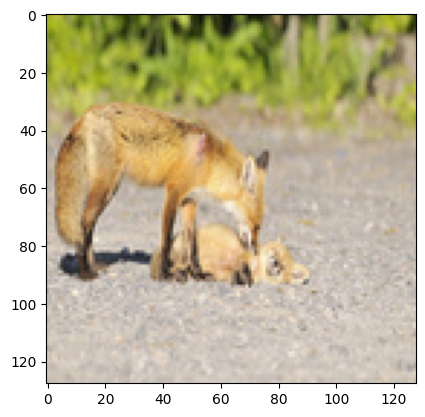

In [17]:
print(fake_dataloader_mnist)
for inputs, labels in fake_dataloader_mnist:
    inputs, labels = inputs, labels.to(device)
    print(labels[0])
    utils.imshow(inputs[0])
#     print(inputs, labels)
    break

In [20]:
model_copycat = utils.create_resnet_model()
# model_copycat = utils.create_resnet_model('./my_weights/copycat_128_m10.pth')

In [ ]:
utils.train(model_copycat, fake_dataloader_mnist, epochs=10, lr=0.001)
torch.save(model_mnist.state_dict(), './my_weights/copycat_128_m10.pth')

Epoch 1/10 - Loss: 0.0956, Accuracy: 96.88%


In [ ]:
fake_dataset_mnist_test = ImageList(
    filename="data/extracted_mnist.txt",
    root="data/IMAGENET",
    color=True,
    transform=transforms.ToTensor(),
    return_filename=False
)
fake_dataset_svhn_test = ImageList(
    filename="data/extracted_svhn.txt",
    root=".",
    color=True,
    transform=transforms.ToTensor(),
    return_filename=False
)

fake_dataloader_mnist = DataLoader(fake_dataset_mnist, batch_size=64, shuffle=False)
fake_dataloader_svhn = DataLoader(fake_dataset_svhn, batch_size=64, shuffle=False)

In [ ]:
model_copycat_teste = utils.create_resnet_model()
utils.train(model_copycat_teste, fake_dataloader_mnist_test, epochs=10, lr=0.001)
torch.save(model_mnist.state_dict(), './my_weights/copycat_128_m10_teste.pth')

In [ ]:
compare_models_in_dataloader('./my_weights/copycat_128_m10.pth',
                             './my_weights/copycat_128_m10_teste.pth',
                             test_dataloader_mnist)

## Evaluate

In [ ]:
model_copycat_mnist = utils.create_resnet_model('./my_weights/copycat_128_m10.pth')

In [ ]:
test_loss, accuracy = utils.evaluate(model_copycat, test_dataloader_mnist)
print(f"model_copycat in mnist dataset- Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(model_copycat, test_dataloader_svhn)
print(f"model_copycat in svhn dataset- Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(model_copycat, test_dataloader_combined)
print(f"model_copycat in combined dataset- Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

In [15]:
def create_copycat_model(string):
    # string = 'm-5_s-5_m-10'
    model = utils.create_resnet_model()
    training = string.split(';')
    for treino in training:
        dataset, epochs = treino.split('_')
        epochs = int(epochs)
        if(dataset == 'm'):
            print(f'treinando {epochs}x no fakedataset do mnist ')
            utils.train(model, fake_dataloader_mnist, epochs=epochs, lr=0.001)
        else:
            print(f'treinando {epochs}x no fakedataset do svhn ')
            utils.train(model, fake_dataloader_svhn, epochs=epochs, lr=0.001)

    torch.save(model.state_dict(), f'./my_weights/copycat_{string}')
    return model

In [16]:
#alternando        
# modelo_alternado20 = create_copycat_model('d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1')
# modelo_alternado40 = create_copycat_model('d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1')

#20 epocas
# modelo_mnist10_svhn10 = create_copycat_model('m_10;s_10') 
# modelo_svhn10_mnist10 = create_copycat_model('s_10;m_10')

treinando 10x no fakedataset do mnist 
Epoch 1/10 - Loss: 0.2377, Accuracy: 90.60%
Epoch 2/10 - Loss: 0.1714, Accuracy: 92.96%
Epoch 3/10 - Loss: 0.1440, Accuracy: 94.04%
Epoch 4/10 - Loss: 0.1250, Accuracy: 94.80%
Epoch 5/10 - Loss: 0.1114, Accuracy: 95.36%
Epoch 6/10 - Loss: 0.1003, Accuracy: 95.83%
Epoch 7/10 - Loss: 0.0903, Accuracy: 96.26%
Epoch 8/10 - Loss: 0.0814, Accuracy: 96.64%
Epoch 9/10 - Loss: 0.0739, Accuracy: 96.96%
Epoch 10/10 - Loss: 0.0673, Accuracy: 97.24%
Training complete.
treinando 10x no fakedataset do svhn 
Epoch 1/10 - Loss: 2.1227, Accuracy: 42.34%
Epoch 2/10 - Loss: 1.3176, Accuracy: 54.83%
Epoch 3/10 - Loss: 1.1705, Accuracy: 58.81%
Epoch 4/10 - Loss: 1.0792, Accuracy: 61.35%
Epoch 5/10 - Loss: 1.0094, Accuracy: 63.34%
Epoch 6/10 - Loss: 0.9512, Accuracy: 65.03%
Epoch 7/10 - Loss: 0.9027, Accuracy: 66.58%
Epoch 8/10 - Loss: 0.8618, Accuracy: 67.87%
Epoch 9/10 - Loss: 0.8265, Accuracy: 69.05%
Epoch 10/10 - Loss: 0.7960, Accuracy: 70.10%
Training complete.
tre

In [19]:
test_loss, accuracy = utils.evaluate(modelo_mnist10_svhn10, test_dataloader_svhn)
print(f"modelo_mnist10_svhn10 in combined dataset - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(modelo_svhn10_mnist10, test_dataloader_svhn)
print(f"modelo_svhn10_mnist10 in combined dataset - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

modelo_mnist10_svhn10 in combined dataset - Test Loss: 21.0537, Accuracy: 71.75
modelo_svhn10_mnist10 in combined dataset - Test Loss: 56.5233, Accuracy: 21.40


In [ ]:
#30 epocas
modelo_mnist10_svhn10 =create_copycat_model('m_10;s_20')
modelo_svhn10_mnist10 =create_copycat_model('s_20;m_10')

In [ ]:
#40 epocas
modelo_mnist20_svhn20 = create_copycat_model('m_20;s_20')
# modelo_svhn20_mnist20 = create_copycat_model('d2_20;d1_20')

# Evaluate all